# ITMAL Exercise L09 Keras-mlp-MNIST 

### Qa Using a Keras MLP on the MNIST-data

Now, make a Keras `Sequential` model and fit it to the MNIST data, re-using as much of the code form the `mlp_moon.ipynb` as you can.

NOTE: you probably need to scale/normalize the MNIST data before a fit, and no 2D-decision boundaries can be drawn from the 784-dimension MNIST data.

In [77]:
from libitmal import kernelfuns as itmalkernelfuns
itmalkernelfuns.EnableGPU()                               

from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, BatchNormalization
from keras.optimizers import Adam, SGD
from keras.utils.np_utils import to_categorical

from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.datasets import fetch_openml

import numpy as np
from time import time

np.random.seed(42)

# Make data
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

y_train_binary = to_categorical(y_train)
y_test_binary  = to_categorical(y_test)

assert y.ndim==1
assert y_train_binary.ndim==2
assert y_test_binary.ndim ==2

# Build Keras model 
model = Sequential()#98
model.add(Dense(input_dim=784, units=98, activation="relu", kernel_initializer="normal"))
model.add(BatchNormalization())
model.add(Dense(units=196, activation="relu"))
model.add(Dense(units=392, activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(units=392, activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(units=196, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(units=98, activation="relu"))
model.add(Dense(units=10, activation="softmax"))

optimizer = SGD(lr=0.01, momentum=0.9, decay=0.0, nesterov=True)
model.compile(loss='categorical_crossentropy', 
              optimizer=optimizer, 
              metrics=['categorical_accuracy', 'mean_squared_error', 'mean_absolute_error'])

# Train
VERBOSE     = 0
EPOCHS      = 20 #using SGD requires a lot more epocs to make a correct decision boundary

start = time()
history = model.fit(X_train, y_train_binary, validation_data=(X_test, y_test_binary), epochs=EPOCHS, verbose=VERBOSE)
t = time()-start
print(f"OK, training time={t:0.1f}")

OK, training time=97.8


Training time: 97.8 sec
Test loss:     0.0881054370906301
Test accuracy: 0.9803333333333333
All scores in history: [0.0881054370906301, 0.9803333333333333, 0.003254340292786007, 0.004466600663571236]


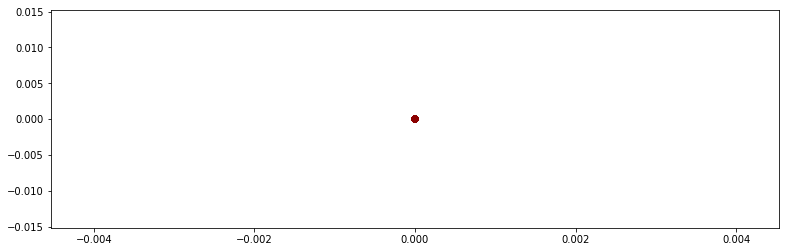

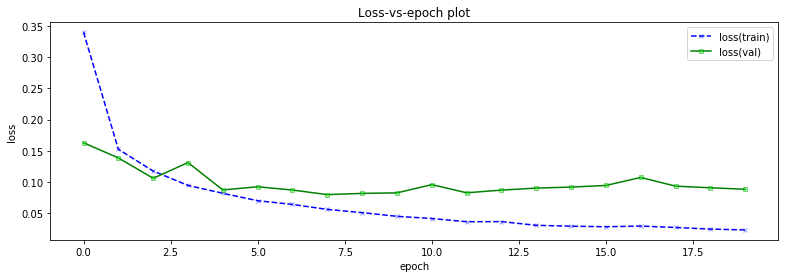

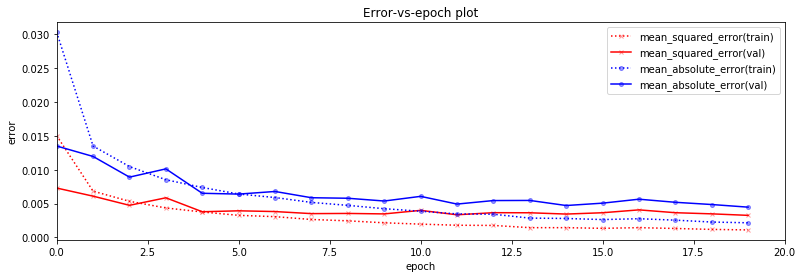

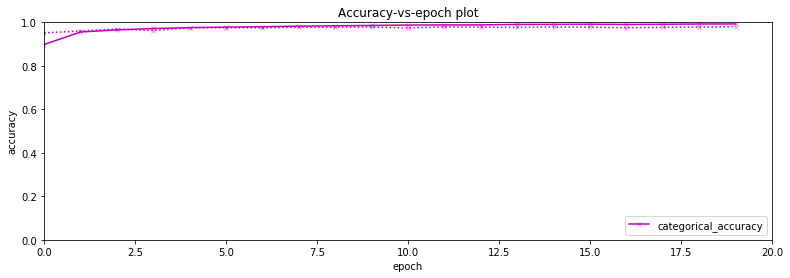

In [85]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

score = model.evaluate(X_test, y_test_binary, verbose=0)

print(f"Training time: {t:0.1f} sec")
print(f"Test loss:     {score[0]}")
print(f"Test accuracy: {score[1]}")
print(f"All scores in history: {score}")

N=4
FX=60
FY=4
A=0.4
S=4

# Plot org data
plt.figure(figsize=(FX, FY))
ax = plt.subplot(1, N, 1)
colors = ['steelblue' if label == 1 else 'darkred' for label in y]
plt.scatter(X[:,0], X[:,1], color=colors, alpha=.5)
plt.show()

# Plot loss
plt.figure(figsize=(FX, FY))
ax = plt.subplot(1, N, 2)
plt.plot(history.history["loss"]    , "b--x", markerfacecolor=(0, 0, 1, A), markersize=S)
plt.plot(history.history["val_loss"], "g-s" , markerfacecolor=(0, 1, 0, A), markersize=S)
plt.legend(loc="best", labels=("loss(train)","loss(val)"))
plt.xlabel("epoch")
plt.ylabel("loss")
plt.title("Loss-vs-epoch plot")
plt.show()

# Plot all metrics + loss
plt.figure(figsize=(FX, FY))
ax = plt.subplot(1, N, 3)
plt.plot(history.history["mean_squared_error"],      "r:x", markerfacecolor=(1, 0, 0, A), markersize=S)
plt.plot(history.history["val_mean_squared_error"],  "r-x", markerfacecolor=(1, 0, 0, A), markersize=S)
plt.plot(history.history["mean_absolute_error"],     "b:o", markerfacecolor=(0, 0, 1, A), markersize=S)
plt.plot(history.history["val_mean_absolute_error"], "b-o", markerfacecolor=(0, 0, 1, A), markersize=S)
plt.xlabel("epoch")
plt.ylabel("error")
plt.xlim((0, EPOCHS))
plt.legend(loc="best", labels=("mean_squared_error(train)",  "mean_squared_error(val)", 
                               "mean_absolute_error(train)", "mean_absolute_error(val)", 
                               "loss(categorical_crossentropy,train)", "loss(categorical_crossentropy,val)"))
plt.title("Error-vs-epoch plot")
plt.show()

# Plot accuracy
plt.figure(figsize=(FX, FY))
ax = plt.subplot(1, N, 4)
plt.plot(history.history["categorical_accuracy"],     "m-x", markerfacecolor=(1, 0, 1, A), markersize=S)
plt.plot(history.history["val_categorical_accuracy"], "m:x", markerfacecolor=(1, 0, 1, A), markersize=S)
ax.set_ylim([0,1])
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.xlim((0, EPOCHS))
plt.legend(loc="lower right", labels=("categorical_accuracy",))
plt.title("Accuracy-vs-epoch plot")
plt.show()

### Qb Repeat Grp10's Go at the Search Quest

Now, try to crank up the accuracy for the model using the MNIST data, you could follow the NN layout found by ITMAL Grp10 using an MLP in the Scikit-learn framework.

Basically, they created a seven-layer `sklearn.neural_network.MLPClassifier`, with layer sizes 20-50-70-100-70-50-20. Their Scikit-learn `MLPClassifier` constructor looked like  

```python
CTOR for best model: MLPClassifier(activation='relu', alpha=0.05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(20, 50, 70, 100, 70, 50, 20),
       learning_rate='adaptive', learning_rate_init=0.001, max_iter=500,
       momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
       power_t=0.5, random_state=None, shuffle=True, solver='sgd',
       tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)
```

See, if you can create a somewhat similar model in Keras, but feel free to replace any of the other hyperparameters (where some are not even present in Keras).

That best accuracy can you get from your model---for your validation or test set? 

For the journal describe your investigation methods and results in your quest-quest for a higher accuracy score on MNIST. 

###  Qb
We managed to crank up the accuracy to about 98 percent, which seems okay, but not as good as group 10's score.
A few different numbers and methods on the layers were tried and ended up with a bunch of layers, and kept the SGD but added 0.9 in momentum. 